In [78]:
from sklearn.svm import SVR
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [23]:
x= np.linspace(0,2,100)
er=np.random.random_sample(size=100)/2 - 0.5
y=np.sin(x**2)+er

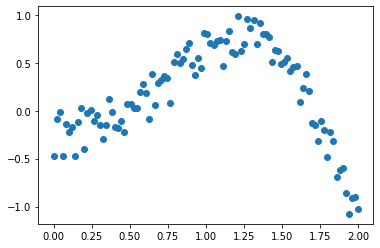

In [24]:
plt.scatter(x,y)

In [67]:
param_grid1 = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']}]
param_grid2=[ {'C': [1, 10, 100, 1000], 'gamma': [0.0001,0.001,0.1,1,10], 'kernel': ['poly'], 'coef0':[0.1,1,5,10]}]
param_grid3=[ {'C': [1, 10, 100, 1000], 'gamma': [0.0001,0.001,0.1,1,10], 'kernel': ['rbf']}]
grid_clf1 = GridSearchCV(SVR(), param_grid1, cv=5)
grid_clf2 = GridSearchCV(SVR(degree=3), param_grid2, cv=5)
grid_clf3 = GridSearchCV(SVR(), param_grid3, cv=5)
grid_clf1.fit(x.reshape(-1,1), y)
grid_clf2.fit(x.reshape(-1,1), y)
grid_clf3.fit(x.reshape(-1,1), y)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.1, 1, 10],
                          'kernel': ['rbf']}])

In [68]:
print("The best parameters for linear are: " + str(grid_clf1.best_params_))
print("The best parameters for poly are: " + str(grid_clf2.best_params_))
print("The best parameters for rbf are: " + str(grid_clf3.best_params_))

The best parameters for linear are: {'C': 1, 'kernel': 'linear'}
The best parameters for poly are: {'C': 1, 'coef0': 0.1, 'gamma': 10, 'kernel': 'poly'}
The best parameters for rbf are: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [79]:
print("The coefficient of determination for the linear classifer is: " + str(clf1.score(x.reshape(-1,1),y)))
print("The coefficient of determination for the poly classifer is: " + str(clf2.score(x.reshape(-1,1),y)))
print("The coefficient of determination for the rbf classifer is: " + str(clf3.score(x.reshape(-1,1),y)))

The coefficient of determination for the linear classifer is: -0.1765743645776896
The coefficient of determination for the poly classifer is: 0.9113147506100493
The coefficient of determination for the rbf classifer is: 0.9203043104715829


In [80]:
print("The mean_squared_error for the linear classifer is: " + str(mean_squared_error(y,clf1.predict(x.reshape(-1,1)))))
print("The mean_squared_error for the poly classifer is: " + str(mean_squared_error(y,clf2.predict(x.reshape(-1,1)))))
print("The mean_squared_error for the rbf classifer is: " + str(mean_squared_error(y,clf3.predict(x.reshape(-1,1)))))

The mean_squared_error for the linear classifer is: 0.2817008417424394
The mean_squared_error for the poly classifer is: 0.021233429994248064
The mean_squared_error for the rbf classifer is: 0.019081108257409087


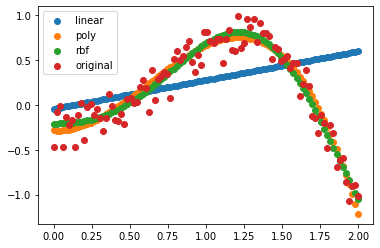

In [82]:
clf1 = SVR(kernel='linear', C=grid_clf1.best_params_['C'])
clf2 = SVR(kernel='poly',degree=3, C=grid_clf2.best_params_['C'], gamma=grid_clf2.best_params_['gamma'],coef0=grid_clf2.best_params_['coef0'])
clf3 = SVR(kernel='rbf', C=grid_clf3.best_params_['C'], gamma=grid_clf3.best_params_['gamma'])
clf1.fit(x.reshape(-1,1),y)
clf2.fit(x.reshape(-1,1),y)
clf3.fit(x.reshape(-1,1),y)
plt.scatter(x,clf1.predict(x.reshape(-1,1)))
plt.scatter(x,clf2.predict(x.reshape(-1,1)))
plt.scatter(x,clf3.predict(x.reshape(-1,1)))
plt.scatter(x,y)
plt.legend(['linear', 'poly','rbf','original'])

In [83]:
clf1 = SVR(kernel='linear')
best_linear=[]
for i in np.linspace(0.1,10,100): 
    clf1.C=i
    average=cross_val_score(clf1,x.reshape(-1,1),y,cv=4,scoring='neg_mean_absolute_error').mean()
    best_linear.append(average)

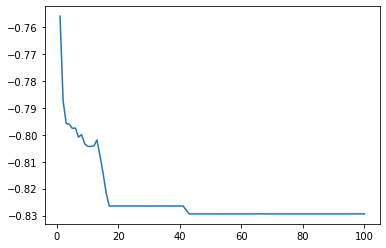

In [88]:
xx=[i+1 for i in range (0,100)]
plt.plot(xx,best_linear)
plt.show()